In [400]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import PIL

seed = 777
np.random.seed(seed)
torch.manual_seed(seed)

In [401]:
print(torch.__version__)
print(torchvision.__version__)
print(PIL.__version__)

1.3.1
0.4.2
6.2.1


In [402]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


# Data augmentation Functions

The following classes define different augmentation approaches.


# Imgaug-Augmentation

In [403]:
from imgaug import augmenters as iaa
import imgaug as ia

class ImgAugTransform:
  def __init__(self):
    self.aug = iaa.Sequential([
        #iaa.Resize((224, 224)),
        iaa.Sometimes(0.25, iaa.GaussianBlur(sigma=(0, 3.0))),
        iaa.Fliplr(0.5),
        iaa.Affine(rotate=(-20, 20), mode='symmetric'),
        iaa.Sometimes(0.25,
                      iaa.OneOf([iaa.Dropout(p=(0, 0.1)),
                                 iaa.CoarseDropout(0.1, size_percent=0.5)])),
        iaa.AddToHueAndSaturation(value=(-10, 10), per_channel=True)
    ])
      
  def __call__(self, img):
    img = np.array(img)
    return self.aug.augment_image(img)

transform_imgaug = ImgAugTransform()

#dataset = torchvision.datasets.ImageFolder('pytorch-examples/data/', transform=transforms)

# Pytorch-Augmentation 

In [404]:
import PIL

transform_pytorch = torchvision.transforms.Compose([
    #torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ColorJitter(hue=.05, saturation=.05),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.RandomRotation(20, resample=PIL.Image.BILINEAR)
])

# Albumentations

In [405]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomContrast, RandomBrightness, Flip, OneOf, Compose
)

transform_albumentations = transforms.Compose([
        RandomRotate90(),
        Flip(),
        Transpose(),
        OneOf([
            IAAAdditiveGaussianNoise(),
            GaussNoise(),
        ], p=0.2),
        OneOf([
            MotionBlur(p=.2),
            MedianBlur(blur_limit=3, p=.1),
            Blur(blur_limit=3, p=.1),
        ], p=0.2),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=.2),
        OneOf([
            OpticalDistortion(p=0.3),
            GridDistortion(p=.1),
            IAAPiecewiseAffine(p=0.3),
        ], p=0.2),
        OneOf([
            CLAHE(clip_limit=2),
            IAASharpen(),
            IAAEmboss(),
            RandomContrast(),
            RandomBrightness(),
        ], p=0.3),
        HueSaturationValue(p=0.3),
    ])

# AutoAugment

rom AutoAugment.autoaugment import CIFAR10Policy
#from autoaugment import CIFAR10Policy
transform_autoaugment =transforms.Compose([
                         #transforms.RandomCrop(32, padding=4, fill=128), # fill parameter needs torchvision installed from source
                         #transforms.RandomHorizontalFlip(),
                         CIFAR10Policy(),  
                         #Cutout(n_holes=1, length=16), # (https://github.com/uoguelph-mlrg/Cutout/blob/master/util/cutout.py)
                         ])

In [406]:
from pytorchAutoAugment.auto_augment import AutoAugment
from pytorchAutoAugment.auto_augment import Cutout

transform_autoaugment = transforms.Compose([
    AutoAugment(),
    #Cutout(),
])


# Split in test and training set with applying of transforms

In [407]:
#The compose function allows for multiple transforms
#transforms.ToTensor() converts our PILImage to a tensor of shape (C x H x W) in the range [0,1]
#transforms.Normalize(mean,std) normalizes a tensor to a (mean, std) for (R, G, B)

transform_tensor_norm = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_imgaug_norm = transforms.Compose([transform_imgaug, transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_pytorch_norm = transforms.Compose([transform_pytorch, transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_albumentations_norm = transforms.Compose([transform_albumentations, transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

transform_autoaugment_norm = transforms.Compose([transform_autoaugment, transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#train_set = torchvision.datasets.CIFAR10(root='./cifardata', train=True, download=True, transform=transform_imgaug)

#test_set = torchvision.datasets.CIFAR10(root='./cifardata', train=False, download=True, transform=transform_imgaug)

train_set_norm = torchvision.datasets.CIFAR10(root='./cifardata', train=True, download=True, transform=transform_tensor_norm)
train_set_imgaug = torchvision.datasets.CIFAR10(root='./cifardata', train=True, download=True, transform=transform_imgaug_norm)
train_set_pytorch = torchvision.datasets.CIFAR10(root='./cifardata', train=True, download=True, transform=transform_pytorch_norm)
train_set_albumentations = torchvision.datasets.CIFAR10(root='./cifardata', train=True, download=True, transform=transform_albumentations_norm)
train_set_autoaugment = torchvision.datasets.CIFAR10(root='./cifardata', train=True, download=True, transform=transform_autoaugment_norm)


test_set = torchvision.datasets.CIFAR10(root='./cifardata', train=False, download=True, transform=transform_tensor_norm)


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [408]:
from torch.utils.data.sampler import SubsetRandomSampler

#Training
n_training_samples = 20000
train_sampler = SubsetRandomSampler(np.arange(n_training_samples, dtype=np.int64))

#Validation
n_val_samples = 5000
val_sampler = SubsetRandomSampler(np.arange(n_training_samples, n_training_samples + n_val_samples, dtype=np.int64))

#Test
n_test_samples = 5000
test_sampler = SubsetRandomSampler(np.arange(n_test_samples, dtype=np.int64))

In [409]:

from torch.autograd import Variable
import torch.nn.functional as F

class SmallNet(torch.nn.Module):
    
    #Our batch shape for input x is (3, 32, 32)
    
    def __init__(self):
        super(SmallNet, self).__init__()
        
        #Input channels = 3, output channels = 18
        self.conv1 = torch.nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        
        self.conv1_bn = torch.nn.BatchNorm2d(16)

        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
        
        self.conv2 = torch.nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        
        self.conv3 = torch.nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        
        self.conv3_bn = torch.nn.BatchNorm2d(32)
        
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        #4608 input features, 64 output features (see sizing flow below)
        self.fc1 = torch.nn.Linear(32 * 8 * 8, 1024)
        
        self.drop_layer = torch.nn.Dropout(p=0.5)
        
        #64 input features, 10 output features for our 10 defined classes
        self.fc2 = torch.nn.Linear(1024, 10)
        
    def forward(self, x):
        
        #Computes the activation of the first convolution
        #Size changes from 
        x = F.relu(self.conv1(x))
        
        x = self.conv1_bn(x)
        
        #Size changes from 
        x = self.pool1(x)
        
        x = F.relu(self.conv2(x))
        
        x = F.relu(self.conv3(x))
        
        x = self.conv3_bn(x)
        
        x = self.pool2(x)
            
        
        #Reshape data to input to the input layer of the neural net
        #Size changes from 
        #Recall that the -1 infers this dimension from the other given dimension
        x = x.view(-1, 2048)
        
        #Computes the activation of the first fully connected layer
        #Size changes from 
        x = F.relu(self.fc1(x))
        
        x = self.drop_layer(x)
        
        #Computes the second fully connected layer (activation applied later)
        #Size changes from
        x = self.fc2(x)
        return(x)

In [410]:

#DataLoader takes in a dataset and a sampler for loading (num_workers deals with system level memory) 
def get_train_loader(batch_size, train_set):
    train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                           sampler=train_sampler, num_workers=0)
    return(train_loader)

In [411]:
#Test and validation loaders have constant batch sizes, so we can define them directly
test_loader = torch.utils.data.DataLoader(test_set, batch_size=4, sampler=test_sampler, num_workers=2)



In [412]:
test_loader.dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [413]:
import matplotlib as mpl
import matplotlib.pyplot as plt
def plotSomeImages(n, dataiter, title):


    n_plots = n
    
    fig=plt.figure(figsize=(12, 10), dpi=80)

    for i in range(n_plots):

        images, labels = dataiter.next()

        img = images[0]
        img = img / 2 + 0.5     # unnormalize

        fig.add_subplot(4,4,i+1)
        plt.imshow(np.transpose(img.numpy(), (1, 2, 0)))


    fig.suptitle(title, fontsize=16)
    plt.show()

# Define the trainsets with the different augmentations and plot them

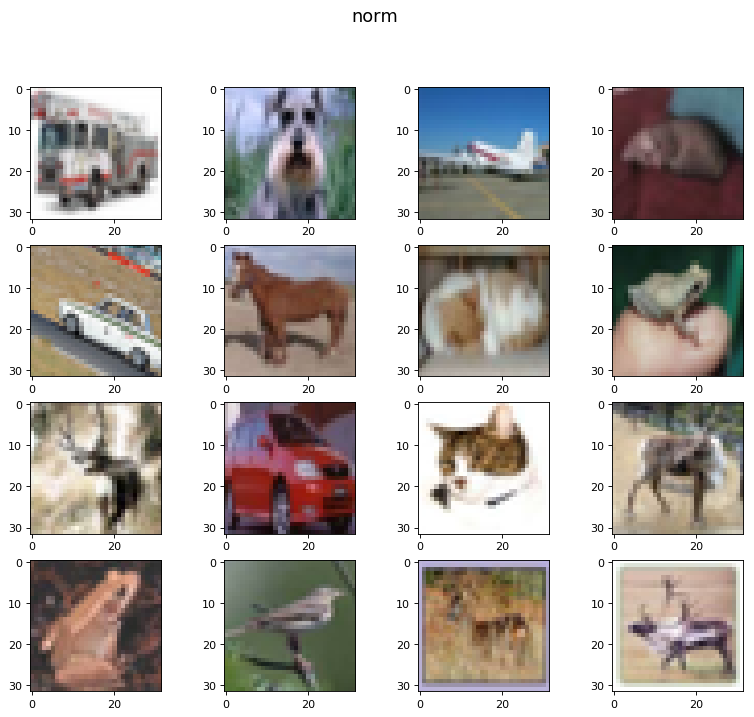

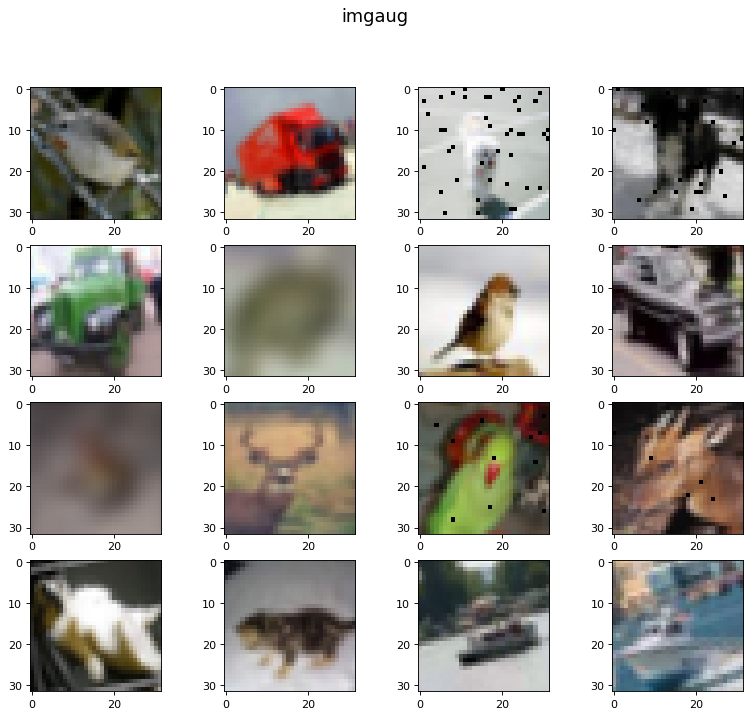

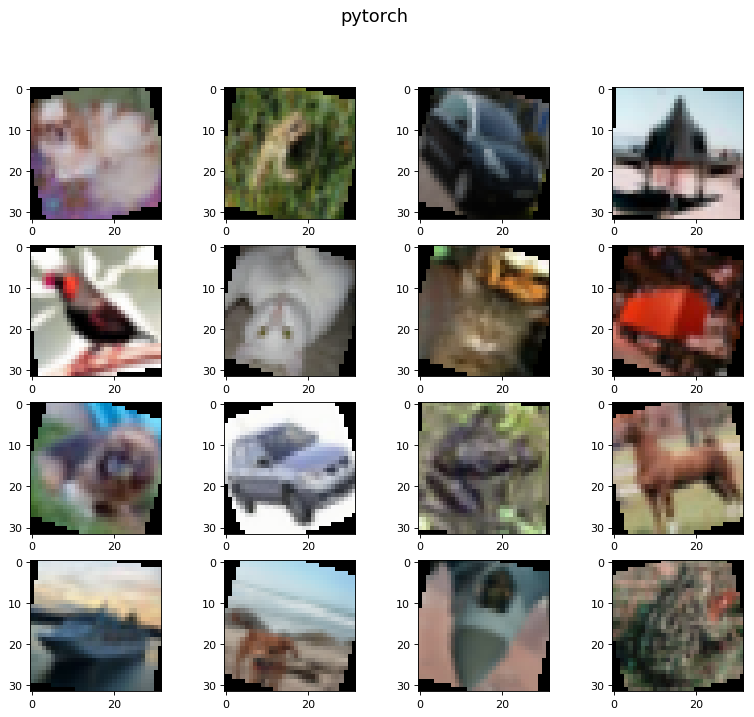

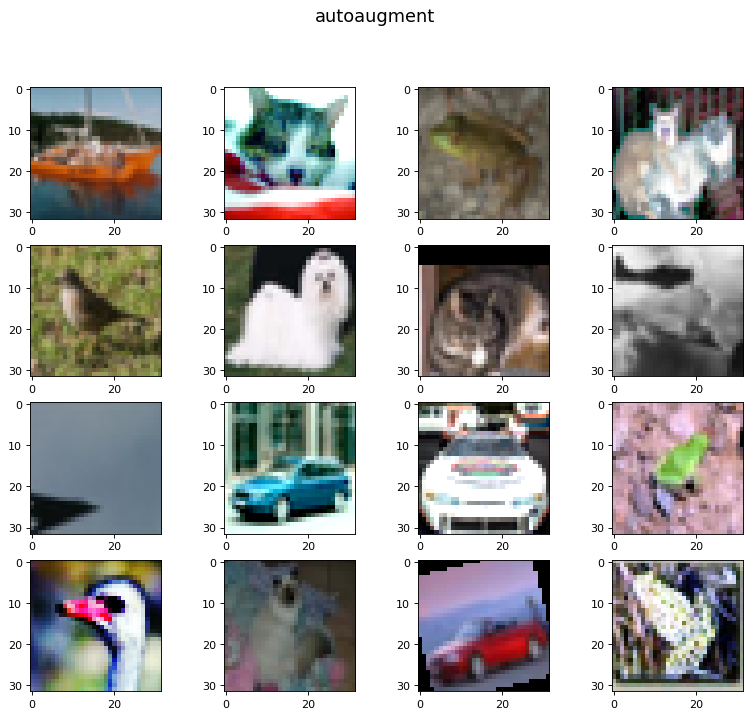

In [414]:


#trainsets = {'norm' : train_set_norm, 'imgaug' : train_set_imgaug, 'pytorch' : train_set_pytorch, 'albumentations' : train_set_albumentations, 'autoaugment' : train_set_autoaugment}
trainsets = {'norm' : train_set_norm, 'imgaug' : train_set_imgaug, 'pytorch' : train_set_pytorch, 'autoaugment' : train_set_autoaugment}

n=16

for key in trainsets:
    #print("Augmentation: " + key)
    loader = get_train_loader(1, trainsets[key])
    dataiter = iter(loader)
    plotSomeImages(n, dataiter, key)


In [415]:

import torch.optim as optim

def createLossAndOptimizer(net, learning_rate=0.001):
    
    #Loss function
    loss = torch.nn.CrossEntropyLoss()
    
    #Optimizer
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    
    return(loss, optimizer)

In [422]:
import time


def trainNet(net, trainset, batch_size, n_epochs, learning_rate):
    
    training_losses = {}
    validation_losses = {}
    
    type_name = list(trainset.keys())[0]

    #Print all of the hyperparameters of the training iteration:
    print("===== HYPERPARAMETERS =====")
    print("batch_size=", batch_size)
    print("epochs=", n_epochs)
    print("learning_rate=", learning_rate)
    print("trainset=", type_name)
    print("=" * 30)

    train_loader = get_train_loader(batch_size, trainset[list(trainset.keys())[0]])
    n_batches = len(train_loader)

    #Create our loss and optimizer functions
    loss, optimizer = createLossAndOptimizer(net, learning_rate)

    #Time for printing
    training_start_time = time.time()

    training_losses = []
    validation_losses = []

    total_train_loss = 0

    #Loop for n_epochs
    for j, epoch in enumerate(range(n_epochs), 0):

        running_loss = 0.0
        print_every = n_batches // 10
        start_time = time.time()
        #total_train_loss = 0

        for i, data in enumerate(train_loader, 0):

            #Get inputs
            inputs, labels = data


            #Wrap them in a Variable object
            inputs, labels = Variable(inputs), Variable(labels)

            #Set the parameter gradients to zero
            optimizer.zero_grad()

            #Forward pass, backward pass, optimize
            outputs = net(inputs)
            loss_size = loss(outputs, labels)
            loss_size.backward()
            optimizer.step()

            #Print statistics

            running_loss += loss_size.data
            total_train_loss += loss_size.data


            training_losses.append(total_train_loss / ((j * n_batches) + (i+1)))


            #Print every 10th batch of an epoch
            if (i + 1) % (print_every + 1) == 0:
                print("Epoch {}, {:d}% \t train_loss: {:.2f} took: {:.2f}s".format(
                        epoch+1, int(100 * (i+1) / n_batches), running_loss / print_every, time.time() - start_time))
                #Reset running loss and time
                running_loss = 0.0
                start_time = time.time()

        #At the end of the epoch, do a pass on the validation set


        #val_loader = torch.utils.data.DataLoader(trainsets[key], batch_size=128, sampler=val_sampler, num_workers=2)
        val_loader = test_loader
        total_val_loss = 0
        for inputs, labels in val_loader:

            #Wrap tensors in Variables
            inputs, labels = Variable(inputs), Variable(labels)

            #Forward pass
            val_outputs = net(inputs)
            val_loss_size = loss(val_outputs, labels)
            total_val_loss += val_loss_size.data

        print("Validation loss = {:.2f}".format(total_val_loss / len(val_loader)))

        validation_losses.append(total_val_loss / len(val_loader))

        print("Training finished, took {:.2f}s".format(time.time() - training_start_time))
        
    '''
    plt.figure(1, figsize=(16, 9), dpi=100)
    plt.plot(training_losses)
    plt.xlabel('Batch', fontsize=18)
    plt.ylabel('Loss', fontsize=18)
    plt.legend(type_name)
    plt.title('Training loss for ' + type_name)
    
    plt.figure(2, figsize=(16, 9), dpi=100)
    plt.plot(validation_losses)
    plt.xlabel('Epoch', fontsize=18)
    plt.ylabel('Loss', fontsize=18)
    plt.legend(type_name)
    plt.title('Validation loss for ' + type_name)
    '''
    
    return training_losses, validation_losses
    
        

# Hyper-Parameters for training

In [417]:
N_EPOCHS = 2
BATCH_SIZE = 32
LEARNING_RATE = 0.001

# Train the same model with different augmentations

===== HYPERPARAMETERS =====
batch_size= 32
epochs= 2
learning_rate= 0.001
trainset= norm
Epoch 1, 10% 	 train_loss: 2.08 took: 4.21s
Epoch 1, 20% 	 train_loss: 1.73 took: 3.87s
Epoch 1, 30% 	 train_loss: 1.61 took: 4.08s
Epoch 1, 40% 	 train_loss: 1.55 took: 5.13s
Epoch 1, 50% 	 train_loss: 1.47 took: 5.55s
Epoch 1, 60% 	 train_loss: 1.44 took: 6.49s
Epoch 1, 70% 	 train_loss: 1.44 took: 7.91s
Epoch 1, 80% 	 train_loss: 1.34 took: 5.61s
Epoch 1, 90% 	 train_loss: 1.40 took: 5.82s
Validation loss = 1.36
Training finished, took 61.72s
Epoch 2, 10% 	 train_loss: 1.17 took: 5.86s
Epoch 2, 20% 	 train_loss: 1.17 took: 5.51s
Epoch 2, 30% 	 train_loss: 1.20 took: 4.73s
Epoch 2, 40% 	 train_loss: 1.20 took: 5.27s
Epoch 2, 50% 	 train_loss: 1.17 took: 5.43s
Epoch 2, 60% 	 train_loss: 1.13 took: 4.55s
Epoch 2, 70% 	 train_loss: 1.17 took: 4.62s
Epoch 2, 80% 	 train_loss: 1.19 took: 3.77s
Epoch 2, 90% 	 train_loss: 1.15 took: 5.55s
Validation loss = 1.26
Training finished, took 119.08s
===== HYPE

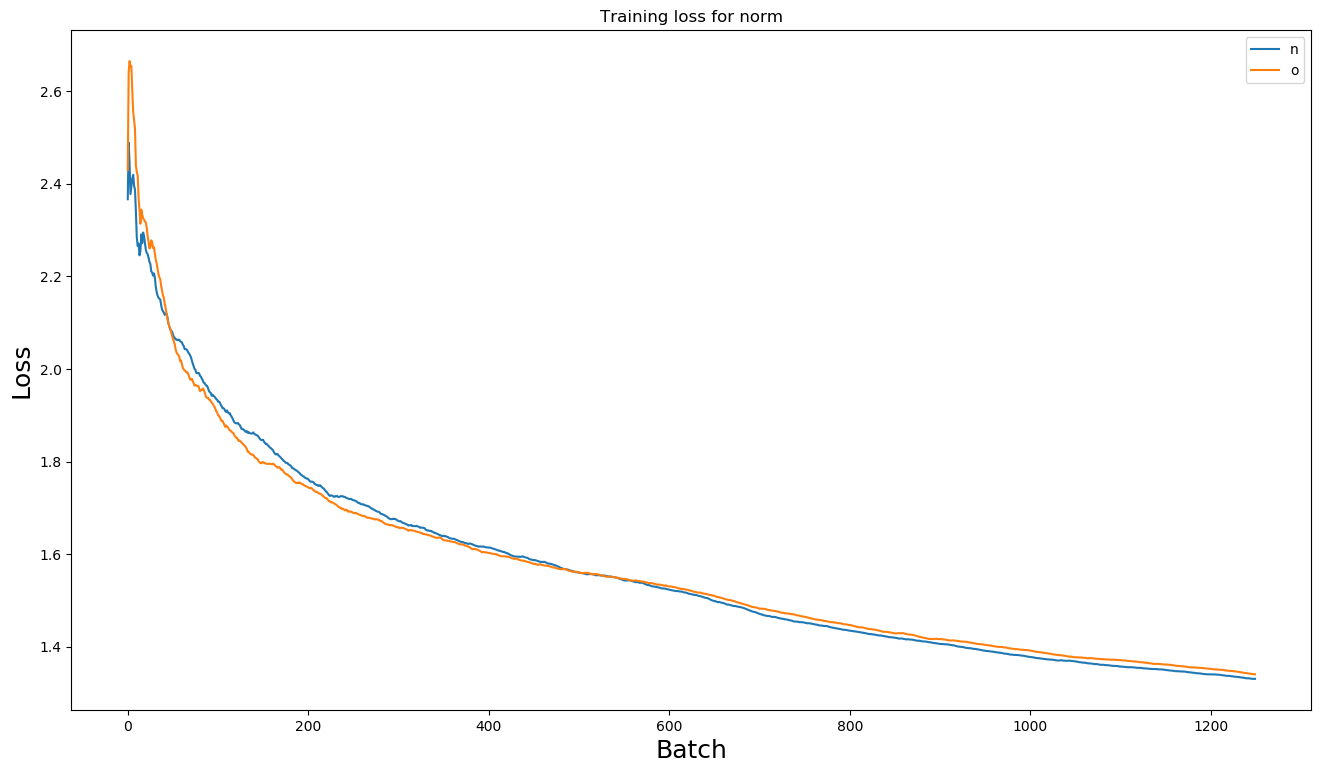

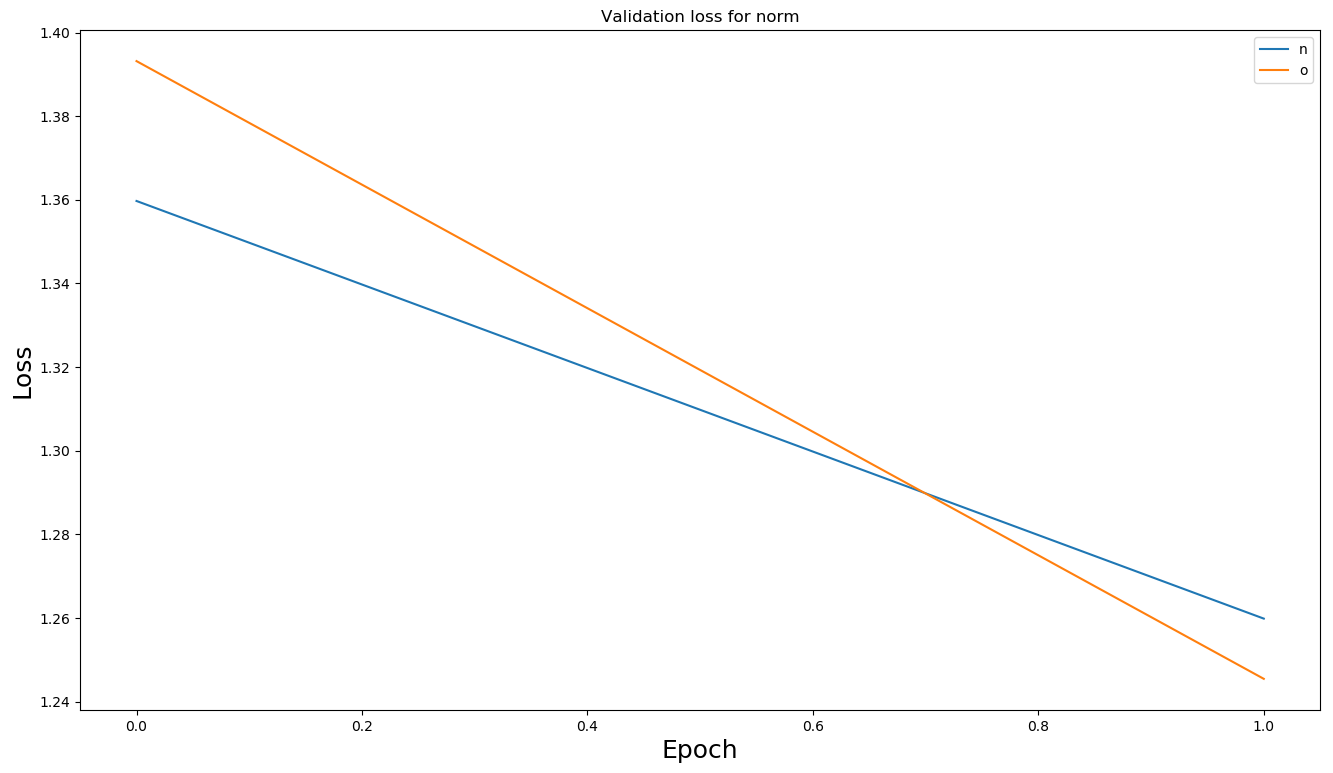

In [418]:

#trainsets = {'norm' : train_set_norm, 'imgaug' : train_set_imgaug, 'pytorch' : train_set_pytorch, 'autoaugment' : train_set_autoaugment}
trainsets = {'norm' : train_set_norm, 'autoaugment' : train_set_autoaugment}

all_training_losses = {}
all_validation_losses = {}

for key in trainsets:
    CNN = SmallNet()
    training_losses, validation_losses = trainNet(CNN, trainsets, batch_size=BATCH_SIZE, n_epochs=N_EPOCHS, learning_rate=LEARNING_RATE)
    all_training_losses[key] = training_losses
    all_validation_losses[key] = validation_losses



# Results compared

Text(0.5, 1.0, 'Validation loss')

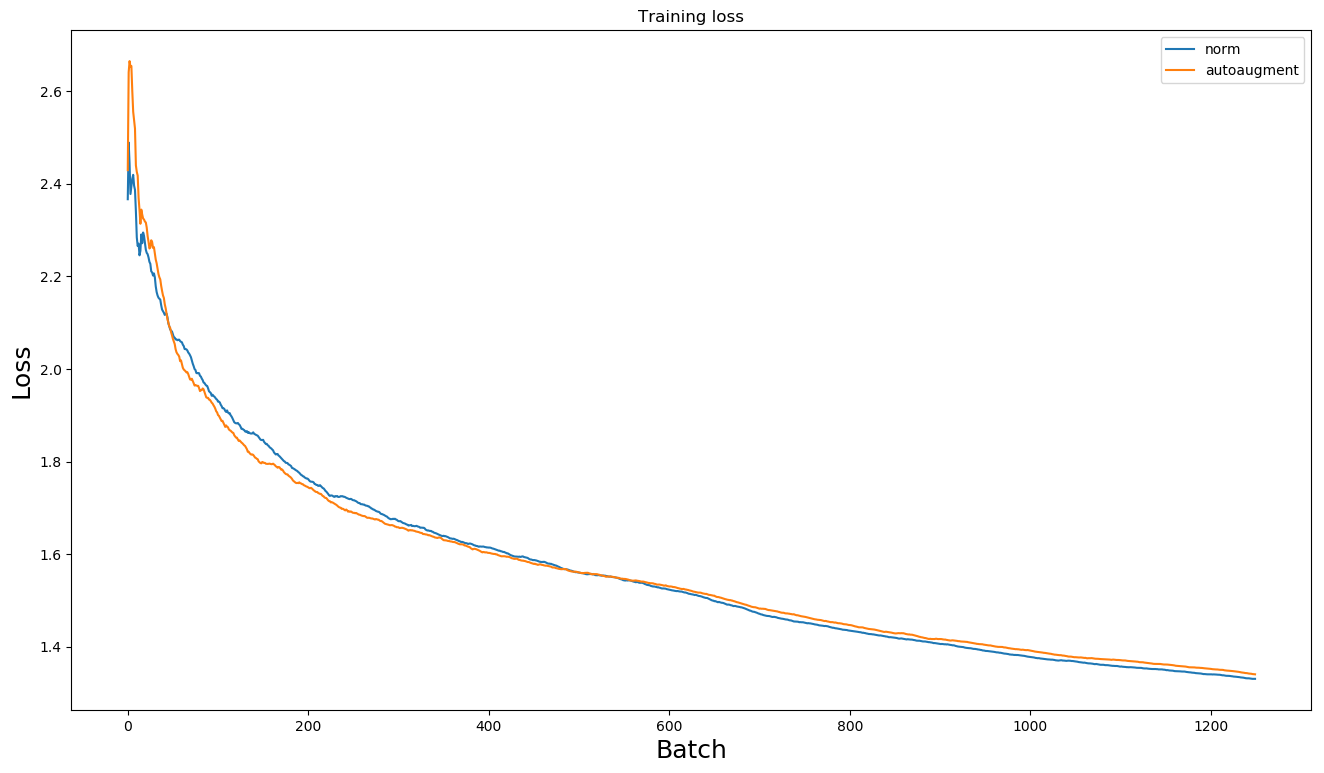

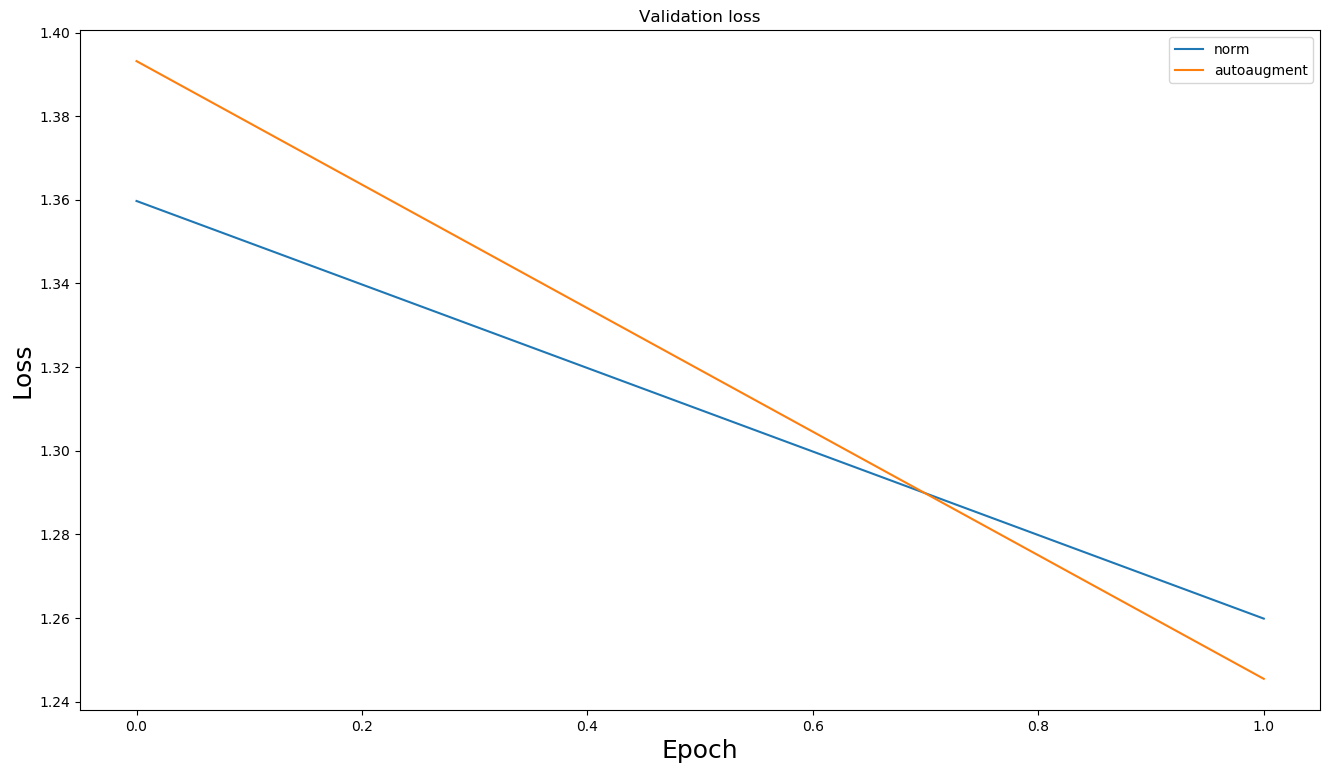

In [423]:
plt.figure(1, figsize=(16, 9), dpi=100)
for key in all_training_losses:
    plt.plot(all_training_losses[key])
plt.xlabel('Batch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.legend(all_training_losses.keys())
plt.title('Training loss')
                                                      
plt.figure(2, figsize=(16, 9), dpi=100)
for key in all_validation_losses:
    plt.plot(all_validation_losses[key])
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.legend(all_validation_losses.keys())
plt.title('Validation loss')

In [420]:
classes = test_loader.dataset.classes

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = CNN(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of airplane : 52 %
Accuracy of automobile : 74 %
Accuracy of  bird : 46 %
Accuracy of   cat : 44 %
Accuracy of  deer : 47 %
Accuracy of   dog : 30 %
Accuracy of  frog : 57 %
Accuracy of horse : 66 %
Accuracy of  ship : 77 %
Accuracy of truck : 62 %


# TODO:

# Fragen